In [87]:
import gym
import numpy as np
import math
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
class PID:
    def __init__(self, kp: float, ki: float, kd: float, set_point=np.array([0.0])):
        self.kp, self.ki, self.kd = kp, ki, kd
        self.set_point = set_point
        self.integral, self.last_error = None, None

    def reset(self):
        self.integral = 0.0
        self.last_error = 0.0

    def action(self, feedback):
        error = self.set_point - feedback

        proportional = self.kp * error
        self.integral += self.ki * error
        derivative = self.kd * (error - self.last_error)
        self.last_error = error

        output = proportional + self.integral + derivative
        output = np.clip(output, a_min=[-2.0], a_max=[2.0])

        return output

In [89]:

class PendulumEnv:
    """ Wrapper over the original gym pendulum environment to only return the theta (angle) as observation"""

    def __init__(self):
        self.env = gym.make('Pendulum-v0')

    def seed(self, *args, **kwargs):
        self.env.seed(*args, **kwargs)

    def reset(self):
        self.env.reset()
        return self._get_obs()

    def step(self, action, **kwargs):
        _, reward, done, info = self.env.step(action, **kwargs)
        return self._get_obs(), reward, done, info

    def render(self, *args, **kwargs):
        return self.env.render(*args, **kwargs)

    def _get_obs(self):
        theta, _ = self.env.state
        return np.array([theta])

    def close(self, *args, **kwargs):
        return self.env.close(*args, **kwargs)


In [96]:
# create controller and reset it
pid = PID(kp=-150, ki=-20, kd=-20, set_point=np.array([0.0]))
pid.reset()

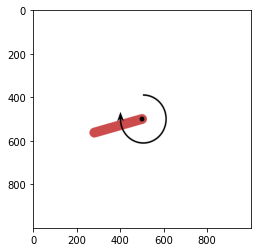

In [97]:
# create, initialize and reset the environment.
env = PendulumEnv()
env.seed(0)
obs = env.reset()

# episode trackers
done = False
episode_reward = 0
ep_obs = []
ep_action =[]
img = plt.imshow(env.render(mode='rgb_array')) # render window

# interact with the environment till termination.
while not done:
    # render
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # step
    action = pid.action(obs)
    ep_obs.append(math.degrees(obs[0]))
    ep_action.append(action[0])
    obs, reward, done, _ = env.step(action)
    episode_reward += reward
env.close()

### `Plots`

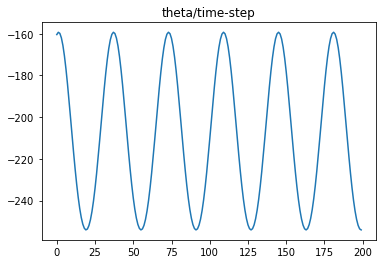

In [98]:
plt.plot(ep_obs)
plt.title('theta/time-step')
plt.show()

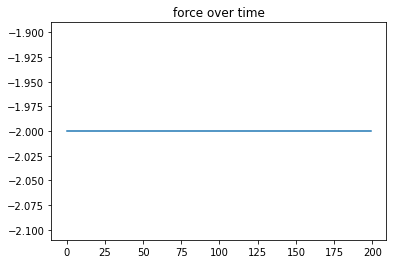

In [99]:
plt.plot(ep_action)
plt.title('force over time')
plt.show()